#Q1

In [ ]:
import statistics as st
from scipy.stats import norm


def CI(vector, alpha, sigma, mu):
  mean_val = st.mean(vector)
  quantile = norm.ppf(1 - (alpha/2))
  lower_bound = mean_val - (quantile*sigma/(len(vector)**0.5))
  upper_bound = mean_val + (quantile*sigma/(len(vector)**0.5))
  interval_length = upper_bound - lower_bound
  bool_contains = True if lower_bound<=mu<=upper_bound else False
  prob_fall_into = norm.cdf(upper_bound, loc=mu, scale=sigma) - norm.cdf(lower_bound, loc=mu, scale=sigma)

  return [lower_bound, upper_bound, interval_length, bool_contains, prob_fall_into]


def generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu):
  list_of_list_of_paramaters=[]
  for vector in midgam:
    curr_list_of_paramaters = CI(vector,alpha, sigma, mu)
    list_of_list_of_paramaters.append(curr_list_of_paramaters)
  return list_of_list_of_paramaters


def mean_interval_length(list_of_list_of_paramaters): #(1a)
  suma = 0
  for list_of_paramaters in list_of_list_of_paramaters:
    suma+= list_of_paramaters[2]
  return suma/len(list_of_list_of_paramaters)


def STD(list_of_list_of_paramaters): #(1b)
  mean = mean_interval_length(list_of_list_of_paramaters)
  suma = 0
  for list_of_paramaters in list_of_list_of_paramaters:
    suma+= (list_of_paramaters[2]-mean)**2
  return (suma/len(list_of_list_of_paramaters))**0.5


def prob_CI_contains(list_of_list_of_paramaters): #(2)
  cnt = 0
  for list_of_paramaters in list_of_list_of_paramaters:
    cnt += 1 if list_of_paramaters[3] else 0
  return cnt/len(list_of_list_of_paramaters)


#for (3) using one of the two below:
#second seem to be more suitable, although the first is more intereseting and maybe more reflective

def fall_into_using_lower_upper_bounds_avg(list_of_list_of_paramaters):
  lower_sum = 0
  upper_sum = 0
  for list_of_paramaters in list_of_list_of_paramaters:
    lower_sum+= list_of_paramaters[0]
    upper_sum+= list_of_paramaters[1]

  lower_bound_mean = lower_sum/len(list_of_list_of_paramaters)
  upper_bound_mean = upper_sum/len(list_of_list_of_paramaters)

  return norm.cdf(upper_bound_mean) - norm.cdf(lower_bound_mean)


def fall_into_using_avg_of_fall_into_prob(list_of_list_of_paramaters):
  summation = 0
  for list_of_paramaters in list_of_list_of_paramaters:
    summation += list_of_paramaters[4]
  return summation/len(list_of_list_of_paramaters)


def present_results(list_of_list_of_paramaters, n, alpha):
  print("n=" + str(n) +", " + "alpha=" + str(alpha) + " results are:" + "\n"
      "(1a) average length of CI: " + str(mean_interval_length(list_of_list_of_paramaters)) + "\n"
      "(1b) STD: " + str(STD(list_of_list_of_paramaters)) + "\n"
      "(2) probability that real expected value within CI: " + str(prob_CI_contains(list_of_list_of_paramaters)) + "\n"
      "(3) probability that on average of the K samples of size n, one sample will appear within CI: " + str(fall_into_using_avg_of_fall_into_prob(list_of_list_of_paramaters))
       + "\n")

##a.

In [ ]:
#distribution paramaters
mu=175
sigma=10

K=10**4
alpha=0.05

###
n=10
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

###
n=20
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

###
n=40
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

###
n=80
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

n=10, alpha=0.05 results are:
(1a) average length of CI: 12.395900646092882
(1b) STD: 1.6751044995544362e-12
(2) probability that real expected value within CI: 0.947
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.4453232220738217

n=20, alpha=0.05 results are:
(1a) average length of CI: 8.765225405765493
(1b) STD: 3.2507330161024584e-13
(2) probability that real expected value within CI: 0.9504
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.3311625767116284

n=40, alpha=0.05 results are:
(1a) average length of CI: 6.197950323046441
(1b) STD: 8.091305403468141e-13
(2) probability that real expected value within CI: 0.9497
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.2404339154383472

n=80, alpha=0.05 results are:
(1a) average length of CI: 4.382612702882747
(1b) STD: 1.6253665080512292e-13
(2) probability that real expected value within CI

- Explanations:

1.   As we could expect before simulating, when we enlarage the size of the vector sample we get smaller CI. The STD of the length of the interval doesn't should as function of n since we use fixed K. Seemingly changes is due to flooring of python.
2.    Does not change becuase alpha does not change.

3. Probability decreases when magnifying sample size due to diminishing in length of CI.





##b.

In [ ]:
###
n=30
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

###
alpha=0.1
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

###
alpha=0.2
midgam = [norm.rvs(loc=mu, scale=sigma, size=n) for i in range(K)]
list_of_list_of_paramaters = generating_list_of_list_of_paramaters(midgam, alpha, sigma, mu)
present_results(list_of_list_of_paramaters, n , alpha)

n=30, alpha=0.05 results are:
(1a) average length of CI: 7.156776574868616
(1b) STD: 0.0
(2) probability that real expected value within CI: 0.9
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.27504743793472264

n=30, alpha=0.1 results are:
(1a) average length of CI: 6.006156235170067
(1b) STD: 0.0
(2) probability that real expected value within CI: 0.9
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.2336379338851416

n=30, alpha=0.2 results are:
(1a) average length of CI: 4.679564673698906
(1b) STD: 0.0
(2) probability that real expected value within CI: 0.8
(3) probability that on average of the K samples of size n, one sample will appear within CI: 0.18140175452713908



- Explanations:

1.   Increasing alpha will result in lower CI length. Again, STD will not change due to K is fixed.
2.  By definition as alpha goes up chances to find the real expected value within CI goes down.

3. The length of CI tends to be smaller as alpha gets bigger, and as a result the probability of finding a sample in a smaller interval is of course getting lower.




# Q2

* Answers to other sections were given by handwrite.

### c.

From c section we got that minimal n is 16. According the graph, if n=14 we get d value of 1.01 which is greater than 1. If n=15 we get a d value of 0.98
which is smaller than 1.
This margin between 16 and 15 derives from python ceiling and flooring calculations.


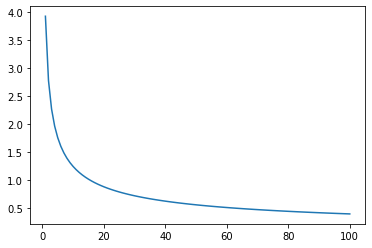

In [ ]:
import matplotlib.pyplot as plt
import math

n=100

num_of_samples = [i for i in range(1,n+1)]
d_values = [1.96*2/(sample)**0.5 for sample in num_of_samples]
plt.plot(num_of_samples, d_values)


for i in range(n):
  if 1>=d_values[i]:
    lst= [i-1,i]
    break

print("From c section we got that minimal n is 16. " + "According the graph, if n=" + str(lst[0]) +
      " we get d value of " + str(round(d_values[lst[0]], 2)) + " which is greater than 1. If n=" + str(lst[1]) + " we get a d value of " + str(d_values[lst[1]]) +"\n" + "which is smaller than 1."
      + "\n" + "This margin between 16 and 15 derives from python ceiling and flooring calculations.")




min_n = math.ceil((1.96*2)**2) #16 and not 15. so we should get a 15 as d value greater than 1 and when n=16 smaller than 1.
val_greater_than1 = d_values[min_n-1] #0.98
val_lesser_than1 = d_values[min_n] #0.95
